# Analyse ROMY Events

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sixdegrees import sixdegrees

## Configurations

In [2]:
config = {
    # Required time window parameters
    'tbeg': "2025-05-13 22:51:00",  # Start time
    'tend': "2025-05-13 23:15:00",  # End time

    # event
    'origin_time': "2025-05-13 22:51:15",
    'magnitude': 6.0,

    # Station coordinates (required)
    'station_lon': 11.275476,  # BSPF longitude
    'station_lat': 48.162941,    # BSPF latitude
    
    # SEED identifiers
    'seed': "XX.ROMY..",     # Default seed ID
    'rot_seed': ["BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV"], # "BW.ROMY.30.BJ*",  # Rotation sensor seed ID
    'tra_seed': ["GR.FUR..BHZ", "GR.FUR..BHN", "GR.FUR..BHE"],  # Translation sensor seed ID
    
    # Data source
    'data_source': "sds",  # "fdsn" | "sds" | "mseed_file"

    # FDSN service
    # 'fdsn_client_rot': "http://george",  # "IRIS",
    # 'fdsn_client_tra': "https://jane.geophysik.uni-muenchen.de",  # "IRIS",

    # Path to SDS for rotation and translation data
    'path_to_sds_rot': "/home/andbro/freenas/romy_archive/",    # SDS path for rotation data
    'path_to_sds_tra': "/home/andbro/bay200/mseed_online/archive/",  # SDS path for translation data

    # Path to inventory of rotation and translation sensor
    'path_to_inv_rot': "/home/andbro/kilauea-data/stationxml_ringlaser/station_BW_ROMY.xml",  # Rotation station inventory
    'path_to_inv_tra': "/home/andbro/kilauea-data/stationxml_ringlaser/station_GR_FUR.xml",  # Translation station inventory
    
    # rotate to ZNE
    'rotate_zne': True,

    # rotation for ROMY components (special case.. not required for pre-processed data)
    'use_romy_zne': True,
    'keep_z': True, # keep Z component from horizontal ring laser

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "ROMY_Analysis",  # Project name

    # Backazimuth calculation parameters
    'baz_step': 1,               # Step size for backazimuth search in degrees
    'time_win_sec': 30,          # Window length in seconds
    'time_win_sec_overlap': 15,  # Window overlap in seconds

    # Optional parameters
    'verbose': True,            # Print detailed information
}

In [3]:
config = {
    # Required time window parameters
    'tbeg': "2023-09-08 22:13:00",  # Start time
    'tend': "2023-09-08 23:00:00",  # End time

    # event
    'origin_time': "2023-09-08 22:11:00",
    'magnitude': 6.8,

    # Station coordinates (required)
    'station_lon': 11.275476,  # BSPF longitude
    'station_lat': 48.162941,    # BSPF latitude
    
    # SEED identifiers
    'seed': "XX.ROMY..",     # Default seed ID
    'rot_seed': ["BW.ROMY.30.BJZ", "BW.ROMY.30.BJN", "BW.ROMY.30.BJE"], # "BW.ROMY.30.BJ*",  # Rotation sensor seed ID
    'tra_seed': ["GR.FUR..BHZ", "GR.FUR..BHN", "GR.FUR..BHE"],  # Translation sensor seed ID
    
    # Data source
    'data_source': "mseed_file",  # "fdsn" | "sds" | "mseed_file"

    # Path to local mseed file
    'path_to_mseed_file': "./data/romy_eventM6.8.mseed",  # "./data/eventM62_6c.mseed",

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "ROMY_Analysis",  # Project name
    
    # Backazimuth calculation parameters
    'baz_step': 1,               # Step size for backazimuth search in degrees
    'twin_sec': 30,          # Window length in seconds
    'twin_overlap': 0.5,  # Window overlap in seconds
    'cc_threshold': 0.75,        # Cross-correlation threshold

    # Filter parameters
    'fmin': 0.02,               # Minimum frequency for filtering
    'fmax': 0.2,                # Maximum frequency for filtering
    
    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [62]:
sd = sixdegrees(conf=config)

Store the configuration as a pickle file

In [63]:
# sd.store_as_pickle(config, "./event_configs/"+f"M{str(config['magnitude']).replace('.','')}_{config['tbeg'][:10].replace('-','')}")

Get key information about the event

In [64]:
ev = sd.get_event_info(origin_time=config['origin_time'],
                       base_catalog="USGS",
                       magnitude=config['magnitude'])

Found event:
Origin time: 2023-09-08T22:11:01.405000Z
Magnitude: 6.8 mww
Location: 31.058°N, -8.385°E
Depth: 19.0 km
Epicentral Distance: 2526.0 km
Epicentral Distance: 22.7°
Backazimuth: 228.4°


This will load the data from the data source:
- local mseed file
- local sds system
- fdsn (online)

and trim it to the time window

In [65]:
sd.load_data(config['tbeg'], config['tend'])

-> fetching GR.FUR..BHZ data from mseed file
-> fetching GR.FUR..BHN data from mseed file
-> fetching GR.FUR..BHE data from mseed file
3 Trace(s) in Stream:
XX.ROMY..BHZ | 2023-09-08T22:12:58.989999Z - 2023-09-08T23:00:00.989999Z | 20.0 Hz, 56441 samples
XX.ROMY..BHN | 2023-09-08T22:12:58.990000Z - 2023-09-08T23:00:00.990000Z | 20.0 Hz, 56441 samples
XX.ROMY..BHE | 2023-09-08T22:12:58.990000Z - 2023-09-08T23:00:00.990000Z | 20.0 Hz, 56441 samples
-> fetching BW.ROMY.30.BJZ data from mseed file
-> fetching BW.ROMY.30.BJN data from mseed file
-> fetching BW.ROMY.30.BJE data from mseed file
-> error processing rotation data: 'sixdegrees' object has no attribute 'rot_inv_file'
3 Trace(s) in Stream:
XX.ROMY..BJZ | 2023-09-08T22:12:59.011600Z - 2023-09-08T23:00:01.011600Z | 20.0 Hz, 56441 samples
XX.ROMY..BJN | 2023-09-08T22:12:58.999400Z - 2023-09-08T23:00:00.999400Z | 20.0 Hz, 56441 samples
XX.ROMY..BJE | 2023-09-08T22:12:59.036600Z - 2023-09-08T23:00:00.986600Z | 20.0 Hz, 56440 samples


Ensure that all traces of stream have the same sample size

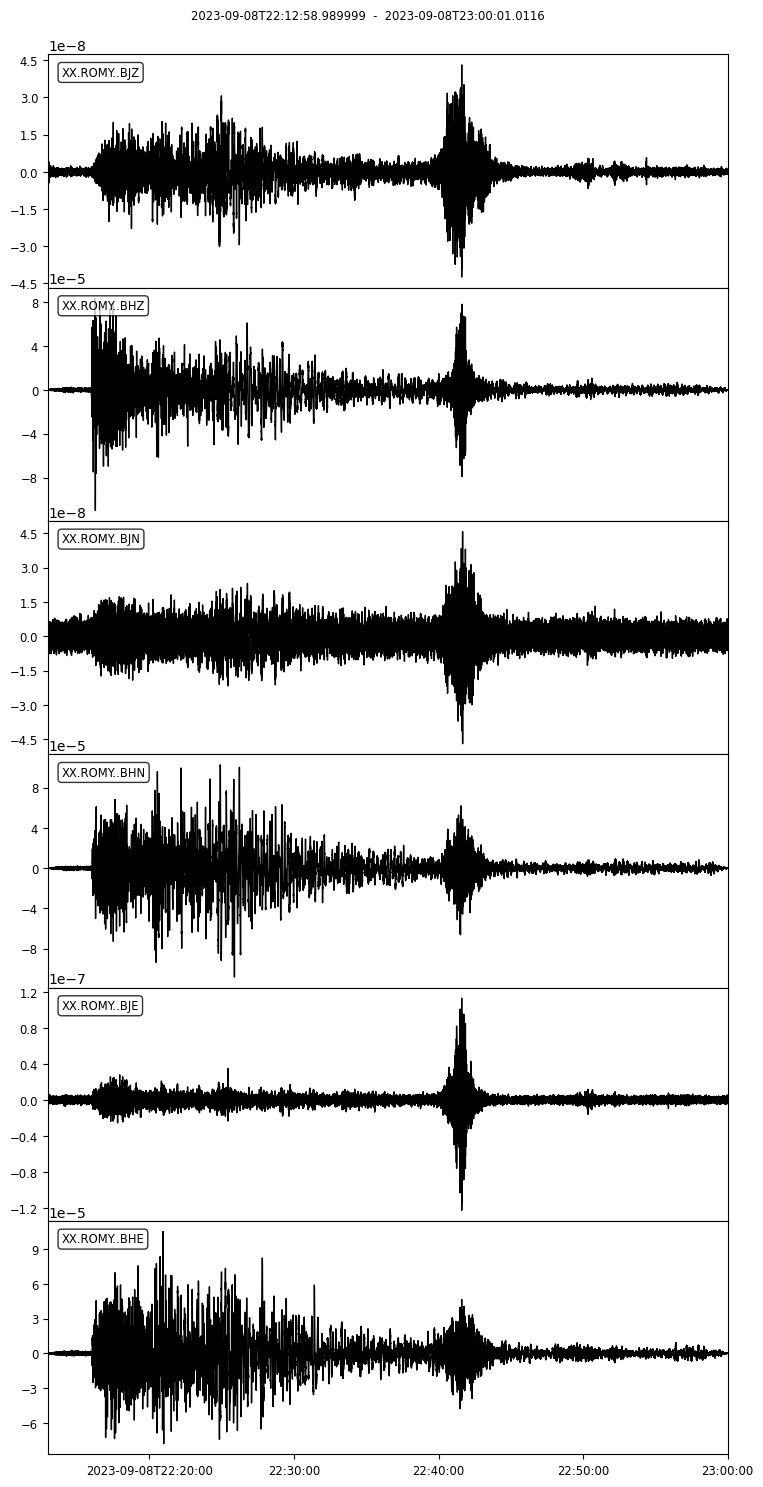

In [66]:
sd.st.plot(equal_scale=False);

In [67]:
sd.trim_stream(set_common=True, set_interpolate=False)

 -> stream size inconsistent: [56441, 56441, 56441, 56441, 56441, 56440]
  -> adjusted: [56440, 56440, 56440, 56440, 56440, 56440]


### Write data to file or SDS system

In [68]:
# write to mseed file
# sd.st.write(f"./data/romy_eventM{config['magnitude']}.mseed", format="MSEED")

# write to sds filesystem
# sd.write_to_sds(sd.st, "./data/", format="MSEED")

## Analysis

Frequency band to filter (this is applied to the stream object after being reset to raw stream)

In [69]:
sd.filter_data(fmin=0.05, fmax=0.4, output=False)

Tmin = 1/sd.fmax
Tmax = 1/sd.fmin

Apply polarity correction if needed. This is applied to the stream object that is processed. If raw is True, the polarity correction is applied to the raw stream too.

In [70]:
sd.polarity_stream(pol_dict={"HZ": -1, "JZ": 1}, raw=True)

let's compare the waveforms of the rotation (red) and translational (black) components 

In [71]:
# sd.st.trim(sd.tbeg+90, sd.tend-400) #turkyie
sd.st.trim(sd.tbeg+200, sd.tend-300) #greek

6 Trace(s) in Stream:
XX.ROMY..BHZ | 2023-09-08T22:16:19.989999Z - 2023-09-08T22:54:59.989999Z | 20.0 Hz, 46401 samples
XX.ROMY..BHN | 2023-09-08T22:16:19.990000Z - 2023-09-08T22:54:59.990000Z | 20.0 Hz, 46401 samples
XX.ROMY..BHE | 2023-09-08T22:16:19.990000Z - 2023-09-08T22:54:59.990000Z | 20.0 Hz, 46401 samples
XX.ROMY..BJZ | 2023-09-08T22:16:20.011600Z - 2023-09-08T22:55:00.011600Z | 20.0 Hz, 46401 samples
XX.ROMY..BJN | 2023-09-08T22:16:19.999400Z - 2023-09-08T22:54:59.999400Z | 20.0 Hz, 46401 samples
XX.ROMY..BJE | 2023-09-08T22:16:19.986600Z - 2023-09-08T22:54:59.986600Z | 20.0 Hz, 46401 samples

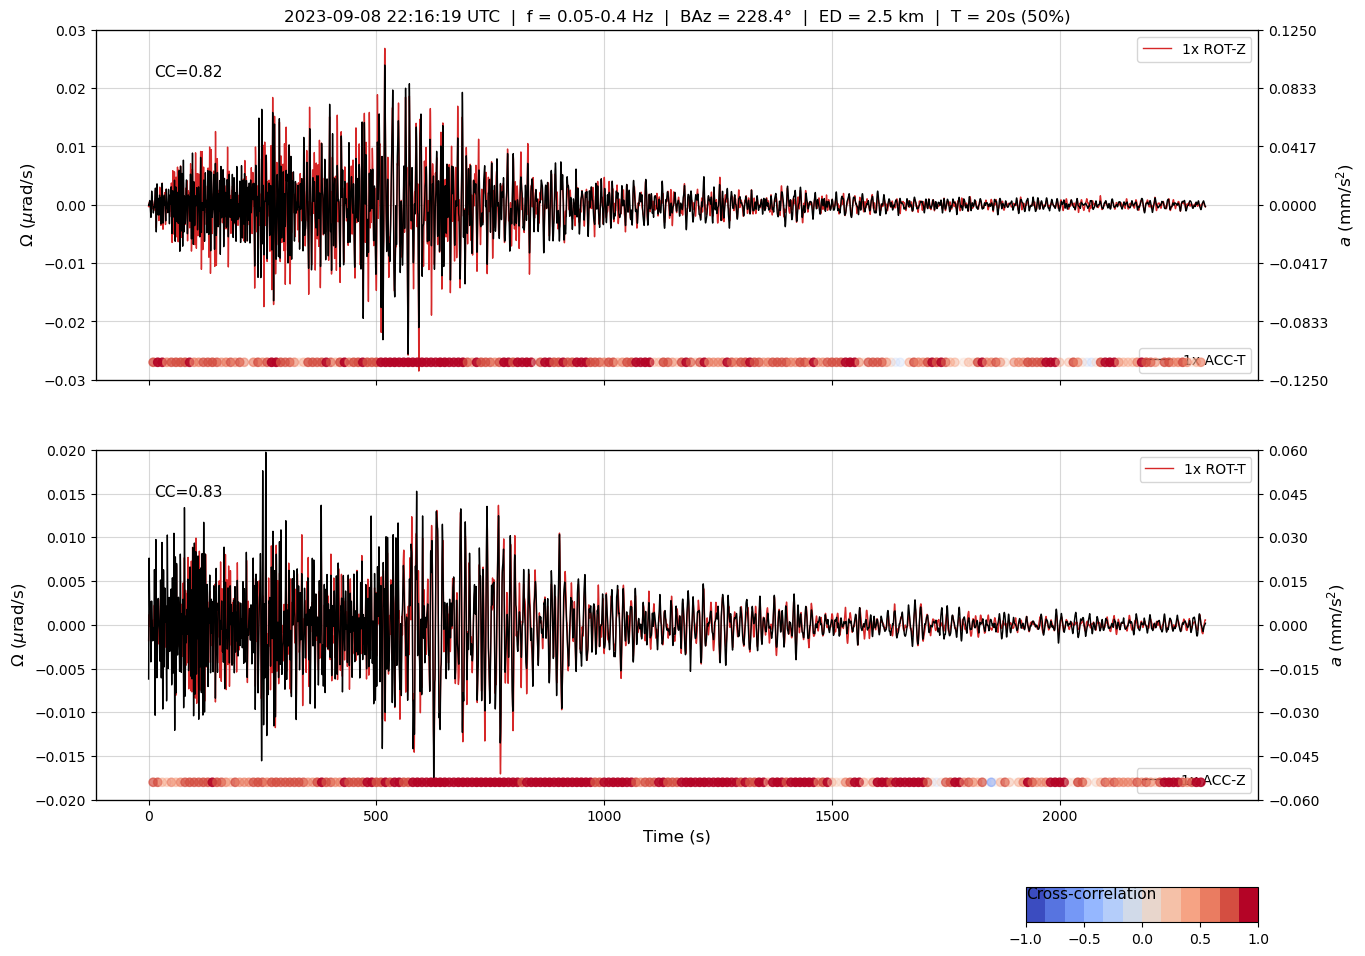

In [72]:
fig = sd.plot_waveform_cc(rot0=sd.get_stream("rotation"),
                        acc0=sd.get_stream("translation"),
                        baz=ev['backazimuth'],
                        distance=ev['distance_km'],
                        fmin=sd.fmin,
                        fmax=sd.fmax, 
                        twin_sec=20,
                        twin_overlap=0.5,
                        wave_type="both"
                        )

### Backazimuth Estimate


using love waves for backazimuth estimation ...
max = 233, mean = 237.0, std = 22.04131597935583


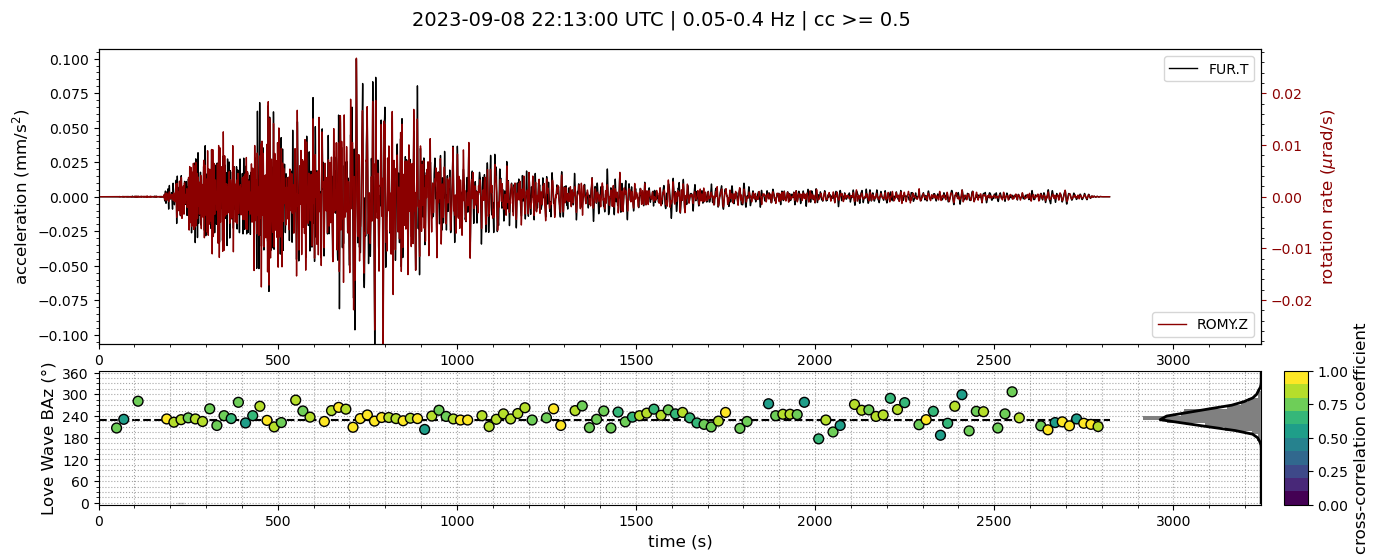

In [44]:
# First compute backazimuth
baz_results = sd.compute_backazimuth(
    wave_type='love',
    baz_step=1,
    baz_win_sec=Tmax,
    baz_win_sec_overlap=0.5,
    out=True
)

# Then plot results
fig = sd.plot_backazimuth_results(
    baz_results,
    wave_type='love',
    baz_theo=ev['backazimuth'],
    cc_threshold=0.5,  # optional
)


using rayleigh waves for backazimuth estimation ...
max = 53, mean = 70.0, std = 63.02079391872814


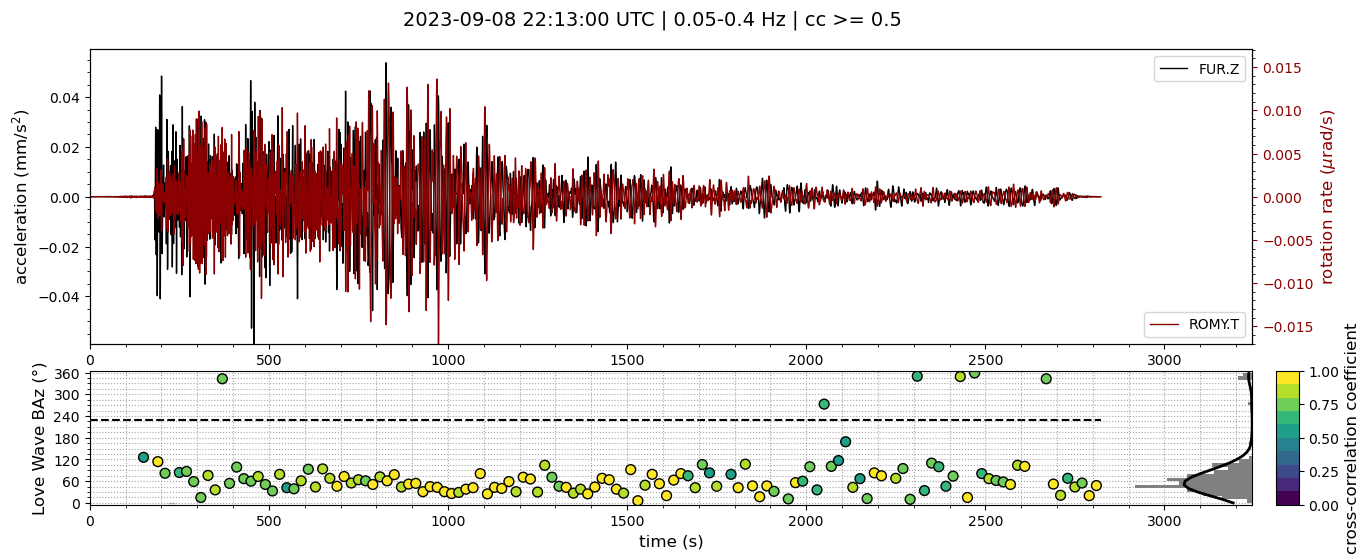

In [45]:
# First compute backazimuth
baz_results = sd.compute_backazimuth(
    wave_type='rayleigh',
    baz_step=1,
    baz_win_sec=Tmax,
    baz_win_sec_overlap=0.5,
    out=True
)

# # Then plot results
fig = sd.plot_backazimuth_results(
    baz_results,
    wave_type='rayleigh',
    baz_theo=ev['backazimuth'],
    cc_threshold=0.5,  # optional
)

### Compare tangent method

Tangent method for horizontal components of rotations versus acceleration. For acceleration the 180 degrees ambiguitiy remains and is modifed based on the a minimum rmse criterion.

In [73]:
# Original tangent method using rotation components
results_rot = sd.compute_backazimuth(
    wave_type="tangent",
    tangent_components="rotation",
    out=True
)

# New tangent method using acceleration components
results_acc = sd.compute_backazimuth(
    wave_type="tangent",
    tangent_components="acceleration",
    out=True
)


using tangent for backazimuth estimation with rotation components...

using tangent for backazimuth estimation with acceleration components...


In [74]:
from utils import plot_tangent_method_comparison

In [75]:
def plot_tangent_method_comparison(results_rot, results_acc, event_info=None, figsize=(12, 6)):
    """
    Simple comparison plot of rotation vs acceleration tangent methods
    
    Parameters:
    -----------
    results_rot : dict
        Results from tangent method using rotation components
    results_acc : dict  
        Results from tangent method using acceleration components
    event_info : dict, optional
        Event information with theoretical backazimuth
    figsize : tuple
        Figure size (width, height)
        
    Returns:
    --------
    matplotlib.figure.Figure
        Simple comparison plot figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    
    # Extract data
    baz_rot = results_rot['cc_max_y'] 
    cc_rot = results_rot['cc_max']
    
    baz_acc = results_acc['cc_max_y']
    cc_acc = results_acc['cc_max']
    
    # Create single plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create bins every 10 degrees
    bins = np.arange(0, 361, 10)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_width = 10
    
    # Plot histograms with offset positioning
    bar_width = bin_width * 0.35
    
    # Rotation histogram (left side of bins)
    counts_rot, _ = np.histogram(baz_rot, bins=bins, density=True)
    ax.bar(bin_centers - bar_width/2, counts_rot, width=bar_width, 
           alpha=0.6, color='blue', edgecolor='darkblue', linewidth=0.5,
           label=f'Rotation (N={len(baz_rot)})')
    
    # Acceleration histogram (right side of bins)
    counts_acc, _ = np.histogram(baz_acc, bins=bins, density=True)
    ax.bar(bin_centers + bar_width/2, counts_acc, width=bar_width, 
           alpha=0.6, color='red', edgecolor='darkred', linewidth=0.5,
           label=f'Acceleration (N={len(baz_acc)})')
    
    # Add KDE curves
    if len(baz_rot) > 1:
        kde_rot = stats.gaussian_kde(baz_rot, weights=cc_rot)
        x_kde = np.linspace(0, 360, 360)
        kde_values_rot = kde_rot(x_kde)
        ax.plot(x_kde, kde_values_rot, color='darkblue', linewidth=2.5, 
                alpha=0.9, label='Rotation KDE')
    
    if len(baz_acc) > 1:
        kde_acc = stats.gaussian_kde(baz_acc, weights=cc_acc)
        x_kde = np.linspace(0, 360, 360)
        kde_values_acc = kde_acc(x_kde)
        ax.plot(x_kde, kde_values_acc, color='darkred', linewidth=2.5, 
                alpha=0.9, label='Acceleration KDE')
    
    # Add theoretical backazimuth if available
    if event_info and 'backazimuth' in event_info:
        theo_baz = event_info['backazimuth']
        ax.axvline(theo_baz, color='green', linestyle='--', 
                   linewidth=3, label=f'Theoretical: {theo_baz:.1f}°')
    
    # Calculate and display statistics

    # calculated maximum of kde and its index and the half width at half maximum
    kde_rot = stats.gaussian_kde(baz_rot, weights=cc_rot)
    kde_acc = stats.gaussian_kde(baz_acc, weights=cc_acc)
    max_rot = np.max(kde_rot.pdf(x_kde))
    max_rot_index = np.where(kde_rot.pdf(x_kde) == max_rot)[0][0]
    max_acc = np.max(kde_acc.pdf(x_kde))
    max_acc_index = np.where(kde_acc.pdf(x_kde) == max_acc)[0][0]
    hwhm_rot = np.abs(x_kde[np.where(kde_rot.pdf(x_kde) > max_rot/2)[0][0]] - x_kde[np.where(kde_rot.pdf(x_kde) > max_rot/2)[0][-1]])
    hwhm_acc = np.abs(x_kde[np.where(kde_acc.pdf(x_kde) > max_acc/2)[0][0]] - x_kde[np.where(kde_acc.pdf(x_kde) > max_acc/2)[0][-1]])
    
    # Add statistics text
    stats_text = f"Rotation: {max_rot_index:.1f}° ± {hwhm_rot:.1f}°\n"
    stats_text += f"Acceleration: {max_acc_index:.1f}° ± {hwhm_acc:.1f}°\n"
    
    # Calculate difference
    diff = abs(max_rot_index - max_acc_index)
    if diff > 180:
        diff = 360 - diff
    stats_text += f"Difference: {diff:.1f}°"
    
    # Add deviations if theoretical available
    if event_info and 'backazimuth' in event_info:
        dev_rot = abs(max_rot_index - theo_baz)
        if dev_rot > 180:
            dev_rot = 360 - dev_rot
        dev_acc = abs(max_acc_index - theo_baz)
        if dev_acc > 180:
            dev_acc = 360 - dev_acc
        stats_text += f"\nRot. Dev.: {dev_rot:.1f}°\nAcc. Dev.: {dev_acc:.1f}°"
    
    # add max_rot and max_acc as vertical lines between 0 and max value
    ax.plot([max_rot_index, max_rot_index], [0, max_rot],
            color='darkblue', linestyle='--', linewidth=2,
            label=f'Rotation Max: {max_rot_index:.1f}°'
            )
    ax.plot([max_acc_index, max_acc_index], [0, max_acc],
            color='darkred', linestyle='--', linewidth=2,
            label=f'Acceleration Max: {max_acc_index:.1f}°'
            )

    # Position statistics text
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=11, fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))
    
    # Configure plot
    ax.set_xlabel('Backazimuth (°)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_title('Tangent Method Comparison: Rotation vs Acceleration Components', 
                 fontsize=14, fontweight='bold')
    ax.set_xlim(0, 360)
    ax.set_xticks([0, 90, 180, 270, 360])
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Remove 0.00 tick label from density axis
    yticks = ax.get_yticks()
    yticks_filtered = yticks[yticks > 0.001]
    if len(yticks_filtered) > 0:
        ax.set_yticks(yticks_filtered)
    
    plt.tight_layout()
    return fig

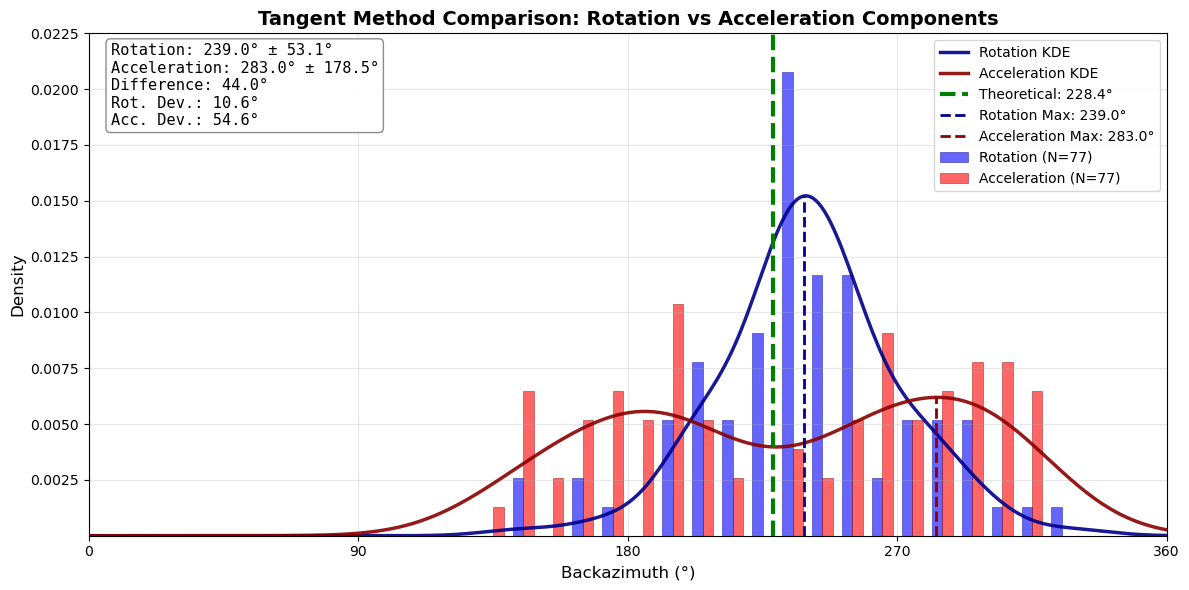

In [76]:
fig = plot_tangent_method_comparison(results_rot, results_acc, event_info=ev)

### Plot Backazimuth Estimation on Map

In [80]:
results = sd.compute_backazimuth_map(
    wave_types=['love', 'rayleigh','tangent'],
    baz_win_sec=Tmax,
    baz_win_sec_overlap=0.5,
    cc_threshold=0.7,
)

Computing love wave backazimuth...

using love waves for backazimuth estimation ...
Computing rayleigh wave backazimuth...

using rayleigh waves for backazimuth estimation ...
Computing tangent backazimuth with rotation components...

using tangent for backazimuth estimation with rotation components...


/home/andbro/cursorfiles/sixdegrees/sixdegrees.py:4874: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


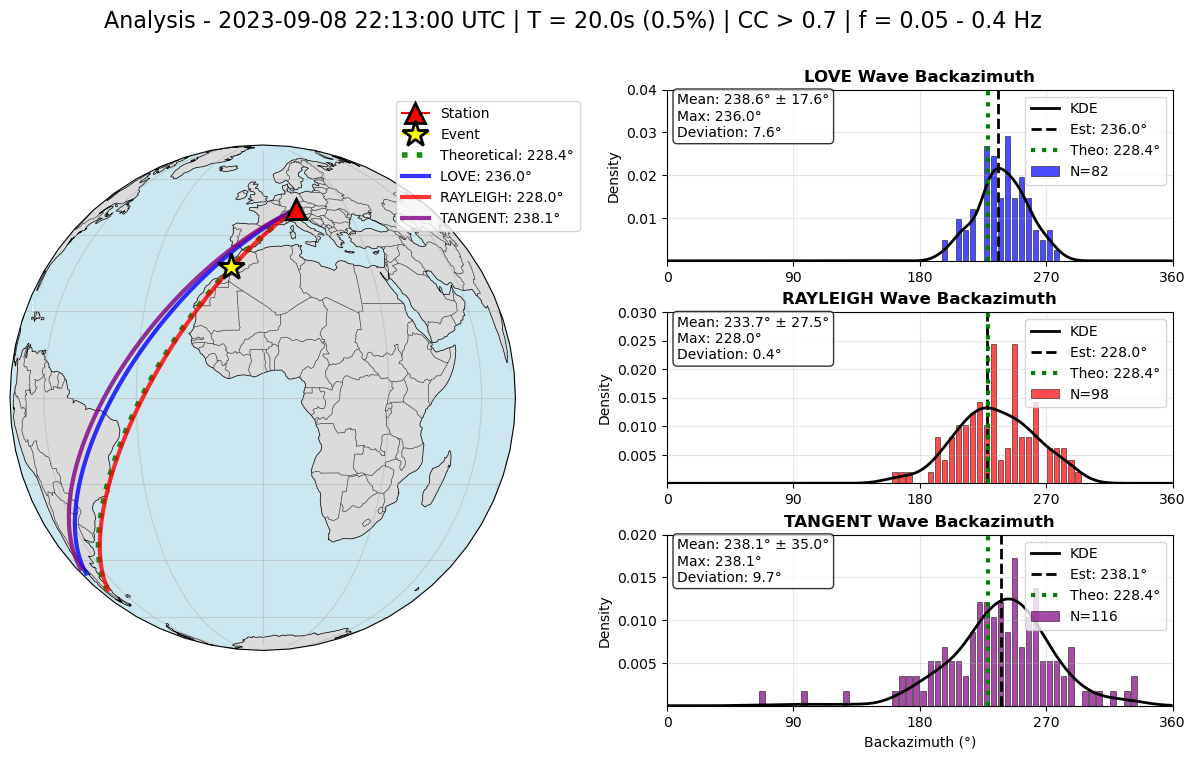

In [82]:
fig = sd.plot_backazimuth_map(
    results,
    event_info=ev,
    map_projection='orthographic',  # 'orthographic' or 'platecarree'
    debug=False,
)

fig.savefig(f"./figures/{config['origin_time']}_backazimuth_map.png")

### Compute and Plot backazimuth by frequency bands

In [87]:
def compute_frequency_dependent_backazimuth(sd_object, wave_types=['love', 'rayleigh'],
                                          fmin=0.01, fmax=0.5, octave_fraction=3,
                                          baz_step=1, baz_win_sec=None, baz_win_sec_overlap=0.5,
                                          cc_threshold=0.5, baz_grid_step=1):
    """
    Compute backazimuth estimation across different frequency bands using octave filtering
    
    Parameters:
    -----------
    sd_object : sixdegrees object
        The sixdegrees object containing the data
    wave_types : list
        List of wave types to analyze ['love', 'rayleigh']
    fmin : float
        Minimum frequency in Hz
    fmax : float
        Maximum frequency in Hz
    octave_fraction : int
        Octave fraction (e.g., 3 for 1/3 octave bands)
    baz_step : int
        Step size for backazimuth search in degrees
    baz_win_sec : float
        Window length in seconds
    baz_win_sec_overlap : float
        Window overlap fraction
    cc_threshold : float
        Minimum cross-correlation threshold
    baz_grid_step : int
        Step size for backazimuth grid for KDE evaluation
        
    Returns:
    --------
    dict : Results dictionary with frequency bands and KDE data
    """
    import numpy as np
    import scipy.stats as sts
    from acoustics.octave import Octave
    from obspy import Stream
    
    print("Computing frequency-dependent backazimuth analysis...")
    
    # Generate octave bands
    octave = Octave(fraction=octave_fraction, fmin=fmin, fmax=fmax)
    center_freqs = octave.center
    lower_freqs = octave.lower
    upper_freqs = octave.upper
    
    print(f"Generated {len(center_freqs)} frequency bands from {fmin} to {fmax} Hz")
    
    # Backazimuth grid for KDE evaluation
    baz_grid = np.arange(0, 360, baz_grid_step)
    
    # Results storage
    results = {
        'frequency_bands': {
            'center': center_freqs,
            'lower': lower_freqs,
            'upper': upper_freqs
        },
        'baz_grid': baz_grid,
        'wave_types': {},
        'parameters': {
            'octave_fraction': octave_fraction,
            'cc_threshold': cc_threshold,
            'baz_win_sec': baz_win_sec,
            'baz_win_sec_overlap': baz_win_sec_overlap
        }
    }
    
    # Store original stream
    original_stream = sd_object.st.copy()
    original_fmin = getattr(sd_object, 'fmin', None)
    original_fmax = getattr(sd_object, 'fmax', None)
    
    try:
        for wave_type in wave_types:
            if wave_type not in ['love', 'rayleigh']:
                continue
                
            print(f"\nProcessing {wave_type} waves...")
            results['wave_types'][wave_type] = {
                'kde_values': np.zeros((len(center_freqs), len(baz_grid))),
                'peak_baz': np.full(len(center_freqs), np.nan),
                'mean_baz': np.full(len(center_freqs), np.nan),
                'cc_mean': np.full(len(center_freqs), np.nan),
                'n_estimates': np.zeros(len(center_freqs), dtype=int)
            }
            
            for i, (fc, fl, fu) in enumerate(zip(center_freqs, lower_freqs, upper_freqs)):
                print(f"  Processing band {i+1}/{len(center_freqs)}: {fl:.3f}-{fu:.3f} Hz (center: {fc:.3f} Hz)")
                
                try:
                    # Reset stream to original
                    sd_object.st = original_stream.copy()
                    
                    # Filter data for this frequency band
                    sd_object.filter_data(fmin=fl, fmax=fu, output=False)
                    
                    # window seconds
                    if baz_win_sec is None:
                        baz_win_sec = 1/fl

                    # Compute backazimuth for this frequency band
                    baz_result = sd_object.compute_backazimuth(
                        wave_type=wave_type,
                        baz_step=baz_step,
                        baz_win_sec=baz_win_sec,
                        baz_win_sec_overlap=baz_win_sec_overlap,
                        out=True
                    )
                    
                    # Process results if valid
                    if 'cc_max' in baz_result and len(baz_result['cc_max']) > 0:
                        mask = baz_result['cc_max'] >= cc_threshold
                        
                        if np.any(mask):
                            baz_estimates = baz_result['cc_max_y'][mask]
                            cc_values = baz_result['cc_max'][mask]
                            
                            # Store basic statistics
                            results['wave_types'][wave_type]['n_estimates'][i] = len(baz_estimates)
                            results['wave_types'][wave_type]['cc_mean'][i] = np.mean(cc_values)
                            results['wave_types'][wave_type]['mean_baz'][i] = np.average(baz_estimates, weights=cc_values)
                            
                            # Compute weighted KDE
                            if len(baz_estimates) > 1:
                                kde = sts.gaussian_kde(baz_estimates, weights=cc_values)
                                
                                # Evaluate KDE on grid
                                kde_values = kde.pdf(baz_grid)
                                results['wave_types'][wave_type]['kde_values'][i, :] = kde_values
                                
                                # Find peak
                                peak_idx = np.argmax(kde_values)
                                results['wave_types'][wave_type]['peak_baz'][i] = baz_grid[peak_idx]
                            else:
                                # Single estimate - create delta-like distribution
                                baz_idx = int(np.round(baz_estimates[0] / baz_grid_step)) % len(baz_grid)
                                results['wave_types'][wave_type]['kde_values'][i, baz_idx] = 1.0
                                results['wave_types'][wave_type]['peak_baz'][i] = baz_estimates[0]
                        else:
                            print(f"    No estimates above threshold for {fc:.3f} Hz")
                    else:
                        print(f"    No valid results for {fc:.3f} Hz")
                        
                except Exception as e:
                    print(f"    Error processing {fc:.3f} Hz: {str(e)}")
                    continue
    
    finally:
        # Restore original stream and filter settings
        sd_object.st = original_stream
        if original_fmin is not None:
            sd_object.fmin = original_fmin
        if original_fmax is not None:
            sd_object.fmax = original_fmax
    
    print(f"\nFrequency-dependent backazimuth analysis completed.")
    return results

In [88]:
results = compute_frequency_dependent_backazimuth(
    sd_object=sd,
    wave_types=['love', 'rayleigh'],
    fmin=0.005,
    fmax=0.8,
    octave_fraction=3,  # 1/3 octave bands
    baz_step=1,
    baz_win_sec=None, # None = 1/fmin
    baz_win_sec_overlap=0.5,
    cc_threshold=0.5,
    baz_grid_step=1
)

Computing frequency-dependent backazimuth analysis...
Generated 23 frequency bands from 0.005 to 0.8 Hz

Processing love waves...
  Processing band 1/23: 0.004-0.006 Hz (center: 0.005 Hz)

using love waves for backazimuth estimation ...
    No estimates above threshold for 0.005 Hz
  Processing band 2/23: 0.006-0.007 Hz (center: 0.006 Hz)

using love waves for backazimuth estimation ...
  Processing band 3/23: 0.007-0.009 Hz (center: 0.008 Hz)

using love waves for backazimuth estimation ...
  Processing band 4/23: 0.009-0.011 Hz (center: 0.010 Hz)

using love waves for backazimuth estimation ...
  Processing band 5/23: 0.011-0.014 Hz (center: 0.013 Hz)

using love waves for backazimuth estimation ...
  Processing band 6/23: 0.014-0.018 Hz (center: 0.016 Hz)

using love waves for backazimuth estimation ...
  Processing band 7/23: 0.018-0.022 Hz (center: 0.020 Hz)

using love waves for backazimuth estimation ...
  Processing band 8/23: 0.022-0.028 Hz (center: 0.025 Hz)

using love waves

In [89]:
def plot_frequency_backazimuth_analysis(results, event_info=None, vmax_percentile=95,
                                       figsize=(12, 10), show_peak_line=True):
    """
    Plot frequency-dependent backazimuth analysis results
    
    Parameters:
    -----------
    results : dict
        Results from compute_frequency_dependent_backazimuth
    event_info : dict, optional
        Event information with 'backazimuth' key for theoretical comparison
    vmax_percentile : float
        Percentile for color scale maximum (to avoid outliers)
    figsize : tuple
        Figure size (width, height)
    show_peak_line : bool
        Whether to show line connecting peak estimates
        
    Returns:
    --------
    matplotlib.figure.Figure : The created figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import LogNorm
    
    wave_types = list(results['wave_types'].keys())
    n_wave_types = len(wave_types)
    
    if n_wave_types == 0:
        print("No wave type results to plot")
        return None
    
    # Create figure
    fig, axes = plt.subplots(n_wave_types, 1, figsize=figsize, sharex=True)
    if n_wave_types == 1:
        axes = [axes]
    
    # Get frequency data
    center_freqs = results['frequency_bands']['center']
    baz_grid = results['baz_grid']
    
    # Create meshgrid for pcolormesh
    freq_edges = np.logspace(np.log10(center_freqs.min()), np.log10(center_freqs.max()), len(center_freqs) + 1)
    baz_edges = np.arange(0, 361, np.diff(baz_grid)[0])
    
    colors = {'love': 'Blues', 'rayleigh': 'Reds'}
    
    for i, wave_type in enumerate(wave_types):
        ax = axes[i]
        data = results['wave_types'][wave_type]
        
        # Get KDE values and normalize for better visualization
        kde_matrix = data['kde_values'].T  # Transpose for correct orientation
        
        # Set colormap limits
        kde_nonzero = kde_matrix[kde_matrix > 0]
        if len(kde_nonzero) > 0:
            vmax = np.percentile(kde_nonzero, vmax_percentile)
            vmin = np.percentile(kde_nonzero, 5)
        else:
            vmax = 1.0
            vmin = 0.01
        
        # Create pcolormesh plot
        colormap = colors.get(wave_type, 'viridis')
        im = ax.pcolormesh(center_freqs, baz_grid, kde_matrix, 
                          cmap=colormap, shading='auto',
                          vmin=vmin, vmax=vmax)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, label='KDE Density', pad=0.02)
        
        # Plot peak line if requested
        if show_peak_line:
            valid_peaks = ~np.isnan(data['peak_baz'])
            if np.any(valid_peaks):
                ax.plot(center_freqs[valid_peaks], data['peak_baz'][valid_peaks], 
                       'k-', linewidth=2, alpha=0.8, label='Peak BAZ')
                ax.scatter(center_freqs[valid_peaks], data['peak_baz'][valid_peaks], 
                       color='k', marker='o', alpha=0.8, facecolor='white', zorder=3)
        
        # Plot theoretical backazimuth if available
        if event_info and 'backazimuth' in event_info:
            ax.axhline(y=event_info['backazimuth'], color='grey', 
                      linestyle='--', linewidth=2, alpha=0.9, label='Theoretical BAZ')
        
        # Customize axes
        ax.set_xscale('log')
        ax.set_ylabel('Backazimuth (°)')
        ax.set_ylim(0, 360)
        ax.set_yticks(np.arange(0, 361, 60))
        ax.grid(True, alpha=0.3)
        ax.set_title(f'{wave_type.upper()} Wave Backazimuth vs Frequency', 
                    fontsize=12, fontweight='bold')
        
        # Add legend if there are lines to show
        if show_peak_line or (event_info and 'backazimuth' in event_info):
            ax.legend(loc='upper right')
        
        # Add statistics text
        n_bands_with_data = np.sum(data['n_estimates'] > 0)
        stats_text = f'Bands with data: {n_bands_with_data}/{len(center_freqs)}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
               verticalalignment='top', fontsize=10)
    
    # Set x-label only for bottom subplot
    axes[-1].set_xlabel('Frequency (Hz)')
    
    # Main title
    octave_frac = results['parameters']['octave_fraction']
    plt.suptitle(f'Frequency-Dependent Backazimuth Analysis (1/{octave_frac} Octave Bands)', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig

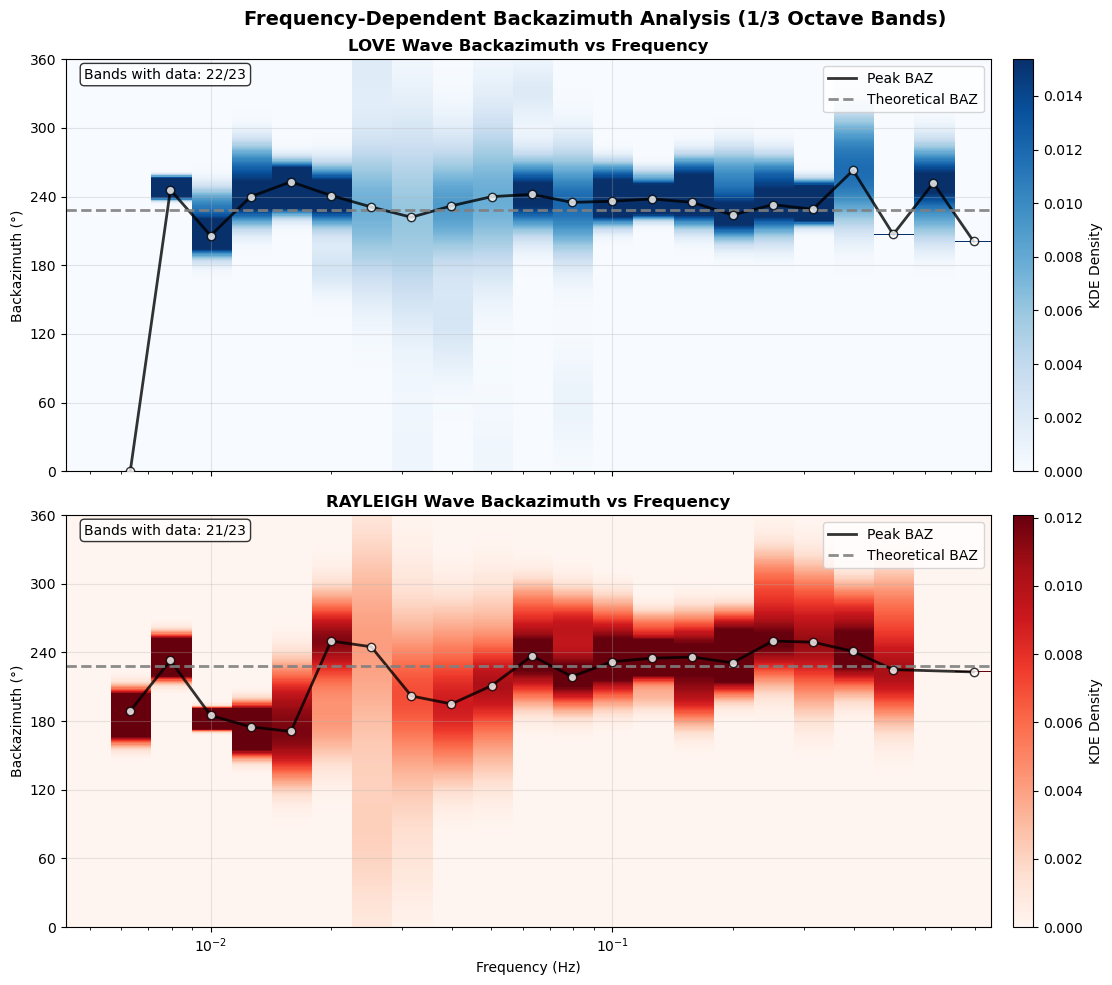

In [90]:
# Plot the results
fig = plot_frequency_backazimuth_analysis(
    results=results,
    event_info=ev,  # Your event information
    vmax_percentile=95,
    figsize=(12, 10),
    show_peak_line=True
)

fig.savefig(f"./figures/{config['origin_time']}_backazimuth_frequency_band_analysis.png")


In [91]:
def plot_backazimuth_deviation_analysis(results, event_info, figsize=(15, 8), bin_step=None):
    """
    Plot deviation analysis between estimated and theoretical backazimuth
    
    Parameters:
    -----------
    results : dict
        Results from compute_frequency_dependent_backazimuth
    event_info : dict
        Event information with 'backazimuth' key for theoretical comparison
    figsize : tuple
        Figure size (width, height)
    bin_step : float, optional
        Bin spacing in degrees (e.g., 5 for bins every 5 degrees). 
        If None, uses automatic binning with 20 bins.
        
    Returns:
    --------
    tuple : (figure, analysis_results)
        Figure object and dictionary with deviation analysis results
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.gridspec import GridSpec
    from scipy import stats
    
    if 'backazimuth' not in event_info:
        print("No theoretical backazimuth available in event_info")
        return None, {}
    
    theoretical_baz = event_info['backazimuth']
    wave_types = list(results['wave_types'].keys())
    n_wave_types = len(wave_types)
    
    if n_wave_types == 0:
        print("No wave type results to analyze")
        return None, {}
    
    # Calculate deviations for each wave type
    deviations = {}
    center_freqs = results['frequency_bands']['center']
    
    for wave_type in wave_types:
        peak_baz = results['wave_types'][wave_type]['peak_baz']
        valid_mask = ~np.isnan(peak_baz)
        
        if np.any(valid_mask):
            # Calculate angular deviation (considering circular nature of angles)
            deviation = peak_baz[valid_mask] - theoretical_baz
            # Wrap to [-180, 180] range
            deviation = ((deviation + 180) % 360) - 180
            
            deviations[wave_type] = {
                'deviation': deviation,
                'frequencies': center_freqs[valid_mask],
                'all_deviation': np.full_like(peak_baz, np.nan),
                'mean_deviation': np.mean(deviation),
                'std_deviation': np.std(deviation),
                'rms_deviation': np.sqrt(np.mean(deviation**2))
            }
            
            # Store all deviations (including NaN for missing estimates)
            all_dev = np.full_like(peak_baz, np.nan)
            dev_calc = peak_baz - theoretical_baz
            dev_calc = ((dev_calc + 180) % 360) - 180
            all_dev[valid_mask] = deviation
            deviations[wave_type]['all_deviation'] = dev_calc
        else:
            print(f"No valid estimates for {wave_type}")
            continue
    
    if not deviations:
        print("No valid deviations to plot")
        return None, {}
    
    # Create figure with layout: main plot + single merged histogram
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(1, 4, figure=fig, width_ratios=[3, 0.8, 0.1, 0.3], 
                 hspace=0.0, wspace=0.0)
    ax_freq = fig.add_subplot(gs[0, 0])
    ax_hist = fig.add_subplot(gs[0, 1], sharey=ax_freq)
    
    # Colors for different wave types
    colors = {'love': 'blue', 'rayleigh': 'red'}
    
    # Plot 1: Deviation vs Frequency with lines to zero (no regression)
    for i, (wave_type, data) in enumerate(deviations.items()):
        color = colors.get(wave_type, f'C{i}')
        
        # Plot vertical lines from zero to each point
        for freq, dev in zip(data['frequencies'], data['deviation']):
            ax_freq.plot([freq, freq], [0, dev], color=color, alpha=0.3, linewidth=1)
        
        # Plot deviation vs frequency markers
        ax_freq.semilogx(data['frequencies'], data['deviation'], 
                        'o', color=color, alpha=0.8, markersize=8,
                        label=f'{wave_type.upper()} waves', markeredgecolor='black',
                        markeredgewidth=0.5)
    
    # Reference line at zero deviation
    ax_freq.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)
    ax_freq.set_xlabel('Frequency (Hz)', fontsize=12)
    ax_freq.set_ylabel('Deviation from Theoretical BAZ (°)', fontsize=12)
    ax_freq.set_title('Backazimuth Deviation vs Frequency', fontsize=14, fontweight='bold')
    
    # Add grid and subgrid
    ax_freq.grid(True, which='major', alpha=0.5, linewidth=1)
    ax_freq.grid(True, which='minor', alpha=0.3, linewidth=0.5)
    ax_freq.minorticks_on()
    
    ax_freq.legend(loc='upper left')
    
    # Determine binning strategy
    all_deviations = np.concatenate([data['deviation'] for data in deviations.values()])
    
    if bin_step is not None:
        # Use fixed degree spacing
        data_min, data_max = np.min(all_deviations), np.max(all_deviations)
        
        # Extend range to nearest bin_step boundaries
        bin_min = np.floor(data_min / bin_step) * bin_step
        bin_max = np.ceil(data_max / bin_step) * bin_step
        
        # Create bins every bin_step degrees
        common_bins = np.arange(bin_min, bin_max + bin_step, bin_step)
        bin_info = f"(bins every {bin_step}°)"
    else:
        # Use automatic binning
        n_bins = 20
        bin_range = (np.min(all_deviations), np.max(all_deviations))
        common_bins = np.linspace(bin_range[0], bin_range[1], n_bins + 1)
        bin_info = f"({len(common_bins)-1} bins)"
    
    # Plot 2: Optimized histogram with KDE overlay
    if n_wave_types == 1:
        # Single wave type
        wave_type = list(deviations.keys())[0]
        data = deviations[wave_type]
        color = colors.get(wave_type, 'blue')
        
        # Create histogram
        counts, bins, patches = ax_hist.hist(data['deviation'], bins=common_bins, alpha=0.6, color=color, 
                                           edgecolor='black', density=True, orientation='horizontal')
        
        # Add KDE overlay
        if len(data['deviation']) > 1:
            kde = stats.gaussian_kde(data['deviation'])
            y_kde = np.linspace(data['deviation'].min(), data['deviation'].max(), 100)
            kde_values = kde(y_kde)
            ax_hist.plot(kde_values, y_kde, color=color, linewidth=2, alpha=0.8, label='KDE')
    
    else:
        # Multiple wave types - optimized layout with bars left/right of bin centers
        bin_centers = (common_bins[:-1] + common_bins[1:]) / 2
        bin_width = np.diff(common_bins)[0]
        
        # Calculate bar positioning
        bar_width = bin_width * 0.35  # Narrower bars
        positions = [-bar_width/2, bar_width/2] if n_wave_types == 2 else [0]  # Left/right positioning
        
        kde_curves = {}  # Store KDE curves for overlay
        
        for i, (wave_type, data) in enumerate(deviations.items()):
            color = colors.get(wave_type, f'C{i}')
            
            # Calculate histogram counts
            counts, _ = np.histogram(data['deviation'], bins=common_bins, density=True)
            
            # Position bars left/right of bin centers
            if n_wave_types > 1:
                offset_bins = bin_centers + positions[i]
            else:
                offset_bins = bin_centers
            
            # Plot bars
            bars = ax_hist.barh(offset_bins, counts, height=bar_width, 
                              color=color, alpha=0.6, edgecolor='black', linewidth=0.5,
                              label=f'{wave_type.upper()}')
            
            # Calculate and store KDE for overlay
            if len(data['deviation']) > 1:
                kde = stats.gaussian_kde(data['deviation'])
                y_kde = np.linspace(common_bins[0], common_bins[-1], 100)
                kde_values = kde(y_kde)
                kde_curves[wave_type] = {'y': y_kde, 'kde': kde_values, 'color': color}
        
        # Overlay KDE curves
        for wave_type, kde_data in kde_curves.items():
            ax_hist.plot(kde_data['kde'], kde_data['y'], 
                        color=kde_data['color'], linewidth=2.5, alpha=0.9,
                        linestyle='-', label=f'{wave_type.upper()} KDE')
    
    # Zero reference line in histogram
    ax_hist.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)
    ax_hist.set_xlabel('Density', fontsize=10)
    ax_hist.set_title(f'Distribution {bin_info}', fontsize=11)
    ax_hist.grid(True, alpha=0.3)
    ax_hist.tick_params(labelleft=False)  # Remove y-axis labels
    
    # Remove 0.00 tick label from density axis
    xticks = ax_hist.get_xticks()
    xticks_filtered = xticks[xticks > 0.001]  # Remove ticks close to zero
    if len(xticks_filtered) > 0:
        ax_hist.set_xticks(xticks_filtered)
    
    # Add legend to histogram
    if n_wave_types > 1:
        ax_hist.legend(loc='upper right', fontsize=8)
    elif n_wave_types == 1 and len(list(deviations.values())[0]['deviation']) > 1:
        ax_hist.legend(loc='upper right', fontsize=8)
    
    # Overall title
    plt.suptitle('Backazimuth Estimation Deviation Analysis', 
                fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    
    # Return results for further analysis (without printing summary)
    analysis_results = {
        'deviations': deviations,
        'theoretical_baz': theoretical_baz,
        'center_frequencies': center_freqs,
        'bin_info': bin_info
    }
    
    return fig, analysis_results

In [74]:
def print_deviation_summary(analysis_results):
    """
    Print detailed summary of deviation analysis results
    
    Parameters:
    -----------
    analysis_results : dict
        Results from plot_backazimuth_deviation_analysis
    """
    import numpy as np
    
    deviations = analysis_results['deviations']
    theoretical_baz = analysis_results['theoretical_baz']
    center_freqs = analysis_results['center_frequencies']
    
    print("="*60)
    print("BACKAZIMUTH DEVIATION ANALYSIS SUMMARY")
    print("="*60)
    print(f"Theoretical Backazimuth: {theoretical_baz:.1f}°")
    print(f"Total Frequency Bands: {len(center_freqs)}")
    if 'bin_info' in analysis_results:
        print(f"Histogram binning: {analysis_results['bin_info']}")
    print()
    
    for wave_type, data in deviations.items():
        print(f"{wave_type.upper()} WAVES:")
        print(f"  Valid estimates: {len(data['deviation'])}/{len(center_freqs)}")
        print(f"  Frequency range: {data['frequencies'].min():.3f} - {data['frequencies'].max():.3f} Hz")
        print(f"  Mean deviation: {data['mean_deviation']:.2f}°")
        print(f"  Std deviation: {data['std_deviation']:.2f}°")
        print(f"  RMS deviation: {data['rms_deviation']:.2f}°")
        print(f"  Median deviation: {np.median(data['deviation']):.2f}°")
        print(f"  Max absolute deviation: {np.max(np.abs(data['deviation'])):.2f}°")
        print(f"  95th percentile: {np.percentile(np.abs(data['deviation']), 95):.2f}°")
        print()

BACKAZIMUTH DEVIATION ANALYSIS SUMMARY
Theoretical Backazimuth: 228.4°
Total Frequency Bands: 23
Histogram binning: (bins every 10°)

LOVE WAVES:
  Valid estimates: 22/23
  Frequency range: 0.006 - 0.794 Hz
  Mean deviation: 10.97°
  Std deviation: 30.15°
  RMS deviation: 32.09°
  Median deviation: 7.10°
  Max absolute deviation: 131.60°
  95th percentile: 34.24°

RAYLEIGH WAVES:
  Valid estimates: 21/23
  Frequency range: 0.006 - 0.794 Hz
  Mean deviation: -7.97°
  Std deviation: 24.75°
  RMS deviation: 26.00°
  Median deviation: 1.60°
  Max absolute deviation: 58.40°
  95th percentile: 53.40°



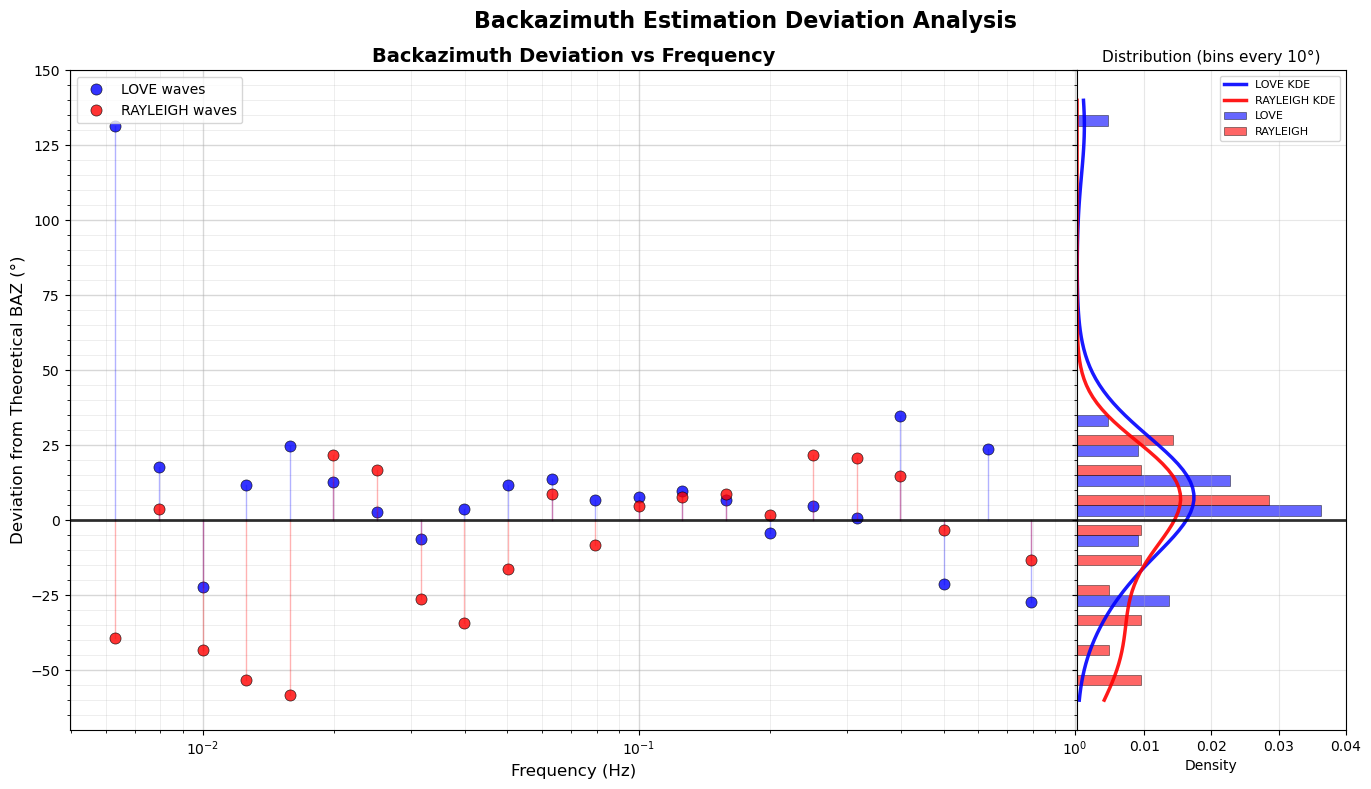

In [75]:
# Analyze deviations
fig, deviation_results = plot_backazimuth_deviation_analysis(
    results=results,
    event_info=ev,  # Must contain 'backazimuth' key
    figsize=(15, 8),
    bin_step=10
)

print_deviation_summary(deviation_results)



using love waves for backazimuth estimation ...

Estimated BAZ Love = 105° (CC ≥ 0.1)

using rayleigh waves for backazimuth estimation ...

Estimated BAZ Rayleigh = 127° (CC ≥ 0.1)

using tangent for backazimuth estimation ...

Estimated BAZ Tangent = 133° (CC ≥ 0.1)


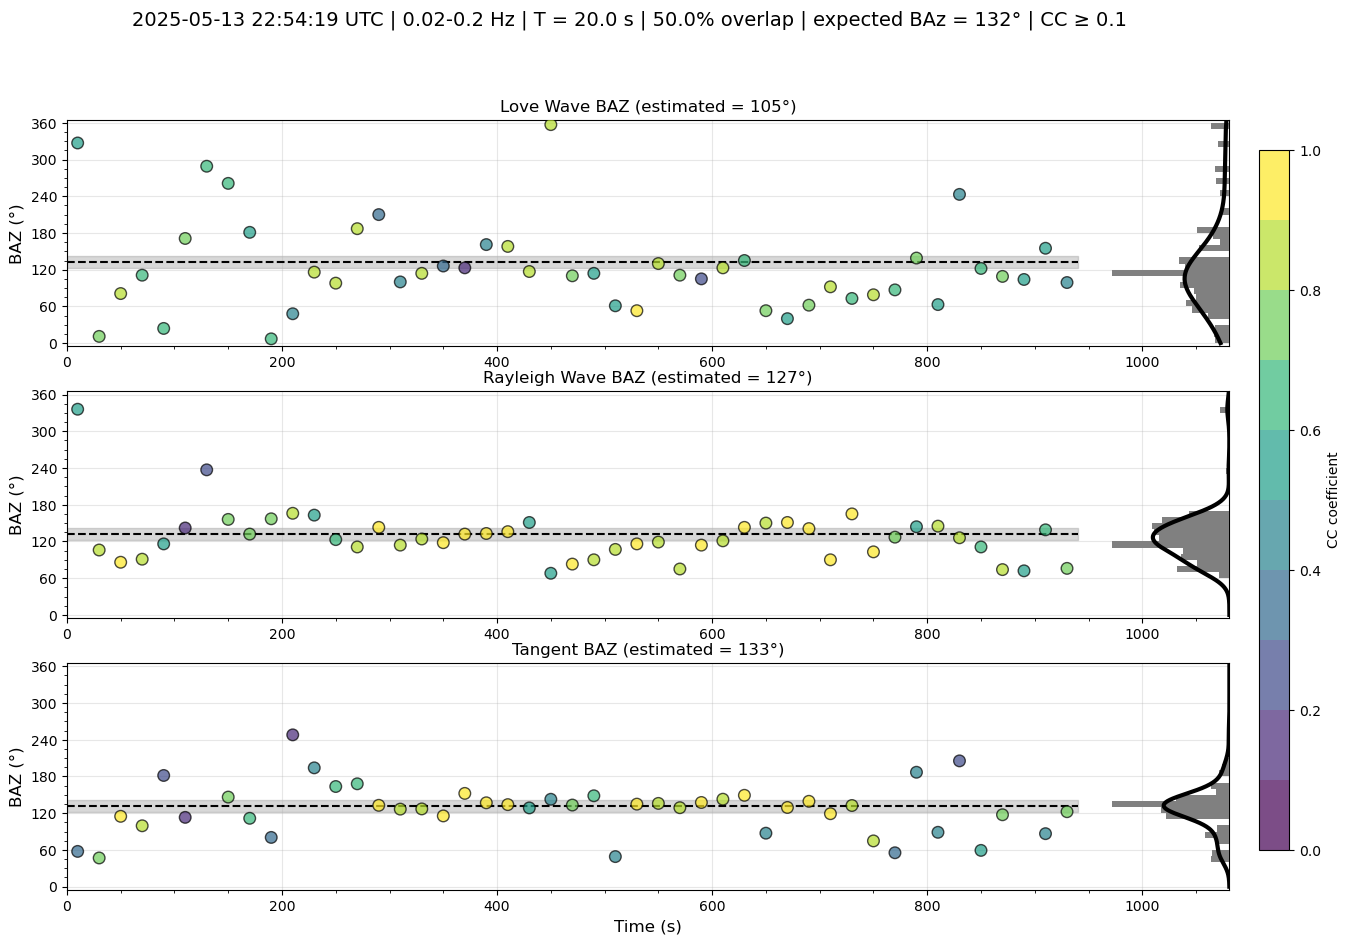

In [40]:
fig, results = sd.compare_backazimuth_methods(
    Twin=20.0,
    Toverlap=0.5,
    invert_rot_z=False,
    invert_acc_z=False,
    cc_threshold=0.1,
    baz_theo=ev['backazimuth'],
    plot=True,
    output=True
)